In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

In [4]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

from matplotlib import pyplot as plt
import seaborn as sns

In [5]:


cid = ''
secret = ''
user = 'evofs'
scope = 'user-library-read playlist-modify-public playlist-read-private'
redirect_uri = 'http://localhost:8889/'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)



In [6]:
# code from youtuber vastava
# https://github.com/vastava/data-science-projects/tree/master/spotify-genre-classifier 


def get_features(username, playlist_id, label, artist):
    results = sp.user_playlist_tracks(username, playlist_id)
    songs = results['items']
    
    while results['next']:
        results = sp.next(results)
        songs.extend(results['items'])    
    ids = []
    names = []        
    for i in range(len(songs)):
        if songs[i]['track'] and songs[i]['track']['id'] != None:
            names.append(songs[i]['track']['name'])
            ids.append(songs[i]['track']['id'])
    ids = list(filter(None, ids))
#     names = list(filter(None, names))
    print(len(ids))
    tmp = len(ids)
    print(len(names))
    features = [] 
    for i in range(0,tmp+50,50):        
        audio_features = sp.audio_features(ids[i:i+50])
        for j in range(len(audio_features)):
#             if i+j > tmp:
#                 break
            if i+j <= tmp and audio_features[j] == None:
                print(audio_features[j])
                del names[i+j]
#                 del ids[i+j]            
            features.append(audio_features[j])
    features = list(filter(None, features))
    df = pd.DataFrame(features)
    df[label] = artist
    df['song_name'] = names
    return df

In [7]:


bones_df = get_features('evofs', '7bPvlaQO0iLEQYNXdrA0lC',"artist",'BONES')
#bones_df = get_features('evofs', '4Tu6uWTIcRLL9qEq2sIAhX', "artist",'BONES') 
bones_df.to_csv('bones.csv', index=False)

523
523


In [9]:
r = bones_df.describe()
r

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,5.230000e+02,523.000000
mean,0.649345,0.444687,5.413002,-12.515348,0.560229,0.085104,0.341751,0.227717,0.151711,0.270538,119.447094,1.333891e+05,3.906310
std,0.161245,0.168876,3.694977,4.185497,0.496834,0.081781,0.296559,0.326136,0.107869,0.208352,27.170651,7.171790e+04,0.525971
min,0.000000,0.013600,0.000000,-32.228000,0.000000,0.000000,0.000036,0.000000,0.051100,0.000000,0.000000,2.618400e+04,0.000000
25%,0.562500,0.339500,2.000000,-14.292000,0.000000,0.038100,0.077800,0.000313,0.102000,0.100000,104.984500,1.054065e+05,4.000000
50%,0.675000,0.445000,6.000000,-11.682000,1.000000,0.052400,0.251000,0.023800,0.113000,0.209000,119.978000,1.281040e+05,4.000000
75%,0.767500,0.542500,9.000000,-9.590500,1.000000,0.093150,0.559500,0.397500,0.149500,0.396000,134.980000,1.506430e+05,4.000000
max,0.951000,0.891000,11.000000,-3.224000,1.000000,0.538000,0.996000,0.984000,0.912000,0.965000,216.032000,1.298928e+06,5.000000


fit, ax = plt.subplots(figsize=(8, 6))
a = sns.barplot(x='danceability', y='mean', data=r, capsize=0.2, ax=ax)

In [10]:
bones_df1=bones_df
bones_df1 = bones_df1.drop(columns=["duration_ms","tempo","loudness"])

In [11]:
bones_df1

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,type,id,uri,track_href,analysis_url,time_signature,artist,song_name
0,0.511,0.465,5,0,0.0389,0.0576,0.875000,0.2170,0.2210,audio_features,2t4Wn8X7nH0fE0YAuUysw2,spotify:track:2t4Wn8X7nH0fE0YAuUysw2,https://api.spotify.com/v1/tracks/2t4Wn8X7nH0f...,https://api.spotify.com/v1/audio-analysis/2t4W...,4,BONES,Burden
1,0.654,0.643,8,0,0.1360,0.0461,0.000000,0.1280,0.4270,audio_features,2T6mUJ4EI7JWyLeKsQVd12,spotify:track:2T6mUJ4EI7JWyLeKsQVd12,https://api.spotify.com/v1/tracks/2T6mUJ4EI7JW...,https://api.spotify.com/v1/audio-analysis/2T6m...,4,BONES,Brimstone (feat. Xavier Wulf)
2,0.570,0.399,8,1,0.0362,0.8900,0.350000,0.0821,0.1340,audio_features,3HaX7pbBbteVkoSQU04Dwo,spotify:track:3HaX7pbBbteVkoSQU04Dwo,https://api.spotify.com/v1/tracks/3HaX7pbBbteV...,https://api.spotify.com/v1/audio-analysis/3HaX...,4,BONES,SafeAndSound
3,0.687,0.318,7,1,0.0454,0.4280,0.000000,0.0749,0.1690,audio_features,5kHwcuf60w7itn1HcfRqXf,spotify:track:5kHwcuf60w7itn1HcfRqXf,https://api.spotify.com/v1/tracks/5kHwcuf60w7i...,https://api.spotify.com/v1/audio-analysis/5kHw...,4,BONES,WannaSeeMyKnifeCollection
4,0.488,0.463,2,1,0.0285,0.0725,0.002630,0.1130,0.1110,audio_features,1JMXRW9qbe4rUN3QkyU91b,spotify:track:1JMXRW9qbe4rUN3QkyU91b,https://api.spotify.com/v1/tracks/1JMXRW9qbe4r...,https://api.spotify.com/v1/audio-analysis/1JMX...,4,BONES,SecondStarToTheRight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,0.724,0.541,8,1,0.0579,0.5170,0.002360,0.1050,0.1810,audio_features,48md80OCUuZqsaZAVjepI6,spotify:track:48md80OCUuZqsaZAVjepI6,https://api.spotify.com/v1/tracks/48md80OCUuZq...,https://api.spotify.com/v1/audio-analysis/48md...,4,BONES,HauntedHouse
519,0.557,0.471,1,1,0.0238,0.6590,0.628000,0.3210,0.5430,audio_features,7Ge5Ho9lkkzC9AMRpQ4Zlx,spotify:track:7Ge5Ho9lkkzC9AMRpQ4Zlx,https://api.spotify.com/v1/tracks/7Ge5Ho9lkkzC...,https://api.spotify.com/v1/audio-analysis/7Ge5...,4,BONES,RedVelvetSofa
520,0.803,0.644,11,0,0.0879,0.1360,0.000078,0.1100,0.4930,audio_features,53zxjAbO2k1HJfQTIMmLNR,spotify:track:53zxjAbO2k1HJfQTIMmLNR,https://api.spotify.com/v1/tracks/53zxjAbO2k1H...,https://api.spotify.com/v1/audio-analysis/53zx...,3,BONES,BobbyKennedy
521,0.624,0.539,4,0,0.0596,0.1010,0.000117,0.1110,0.0392,audio_features,2xOcgZIkAmv2ixOW5nZrhW,spotify:track:2xOcgZIkAmv2ixOW5nZrhW,https://api.spotify.com/v1/tracks/2xOcgZIkAmv2...,https://api.spotify.com/v1/audio-analysis/2xOc...,4,BONES,LimitedEdition


<AxesSubplot:>

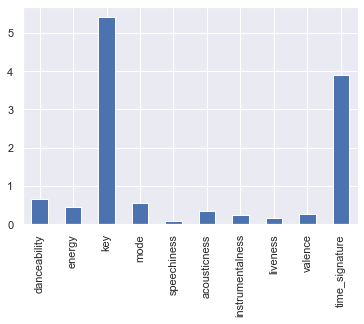

In [12]:
bones_df1.mean().plot(kind='bar')